# Data Series Analysis of USDBRL and USDCNH¶

The data for the two series comes from the FRED database. After retrieving the data for the last 3 years, we merge it into one single dataframe and compute the log returns. Then, we plot the two series with scatter plot and draw the linear regression and write the equation to see if there is explanatory power into on currency or the other. 

Finally we compute the Beta of the two currencies to see the hedge ratio in case of a pair trade.


In [0]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import seaborn as sns
style.use('ggplot')

In [0]:
start = dt.datetime(2018,1,4)
end = dt.datetime(2020,12,31)

In [0]:
# Import data from FRED
df1 = web.DataReader('DEXBZUS', 'fred', start, end)
df2 = web.DataReader('DEXCHUS', 'fred', start, end)

In [0]:
# Save the series into two csv files
df1.to_csv('DEXBZUS.csv')
df2.to_csv('DEXCHUS.csv')

In [0]:
# Open the series from the csv and merge them into one dataframe
df1 = pd.read_csv('DEXBZUS.csv', parse_dates=True, index_col=0)
df2 = pd.read_csv('DEXCHUS.csv', parse_dates=True, index_col=0)
df = pd.merge(df1, df2, on='DATE', how='outer')

            DEXBZUS  DEXCHUS
DATE                        
2018-01-04   3.2274   6.4915
2018-01-05   3.2285   6.4875
2018-01-08   3.2308   6.4970
2018-01-09   3.2491   6.5263
2018-01-10   3.2363   6.5055


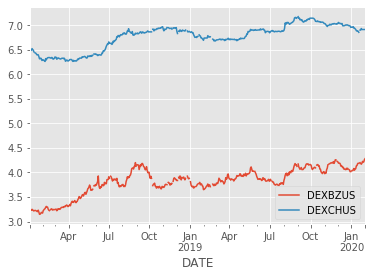

In [6]:
print(df.head())
df.plot()

## Compute Log returns and save them into a new column or % points


In [0]:
df['BZUS_RET'] = np.log(df['DEXBZUS'] / df['DEXBZUS'].shift(1))
df['CHUS_RET'] = np.log(df['DEXCHUS'] / df['DEXCHUS'].shift(1))
# df['CHUS_RET'] = df['DEXCHUS'].pct_change()

In [8]:
df.fillna(0)
#df.isna().sum()

,DEXBZUS,DEXCHUS,BZUS_RET,CHUS_RET
DATE,,,,
2018-01-04,3.2274,6.4915,0.000000,0.000000
2018-01-05,3.2285,6.4875,0.000341,-0.000616
2018-01-08,3.2308,6.4970,0.000712,0.001463
2018-01-09,3.2491,6.5263,0.005648,0.004500
2018-01-10,3.2363,6.5055,-0.003947,-0.003192
...,...,...,...,...
2020-01-27,4.2268,6.9161,0.009246,0.000000
2020-01-28,4.2094,6.9161,-0.004125,0.000000
2020-01-29,4.2162,6.9161,0.001614,0.000000


In [9]:
# Let's see what the two series look like
df['BZUS_RET'].describe()


count    492.000000
mean       0.000409
std        0.008121
min       -0.048626
25%       -0.004413
50%        0.000634
75%        0.005436
max        0.028812
Name: BZUS_RET, dtype: float64

In [10]:
df['CHUS_RET'].describe()


count    492.000000
mean       0.000081
std        0.002730
min       -0.010986
25%       -0.001367
50%        0.000000
75%        0.001440
max        0.015644
Name: CHUS_RET, dtype: float64

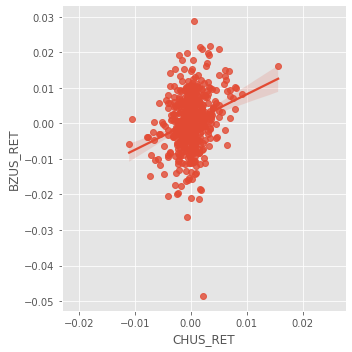

In [11]:
sns.lmplot(x='CHUS_RET',y='BZUS_RET',data=df)
fit_reg=True
hue='index'

In [12]:
# Then we do a linear regression and print results
import statsmodels.formula.api as sm
result = sm.ols(formula='BZUS_RET ~ CHUS_RET', data=df).fit()
print(result.params)
print(result.summary())

#R sq. of 0.075 means there is no explanatory power into the linear regression

Intercept    0.000346
CHUS_RET     0.780746
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               BZUS_RET   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     36.24
Date:                Fri, 07 Feb 2020   Prob (F-statistic):           3.42e-09
Time:                        18:33:35   Log-Likelihood:                 1688.1
No. Observations:                 492   AIC:                            -3372.
Df Residuals:                     490   BIC:                            -3364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

In [13]:
#We can also compute Beta as ( Std1 * Corr12) / Std2 and get the same result as in the regression

( df['BZUS_RET'].std() * df['BZUS_RET'].corr(df['CHUS_RET']) ) / df['CHUS_RET'].std()

0.780745875146639

The final equation will look like this:
BZUS_RET = 0.789*CHUS_RET + 0.0002

Code by: https://github.com/mrstp